0001-image20056.jpg - PSNR: 5.33, SSIM: 0.4078


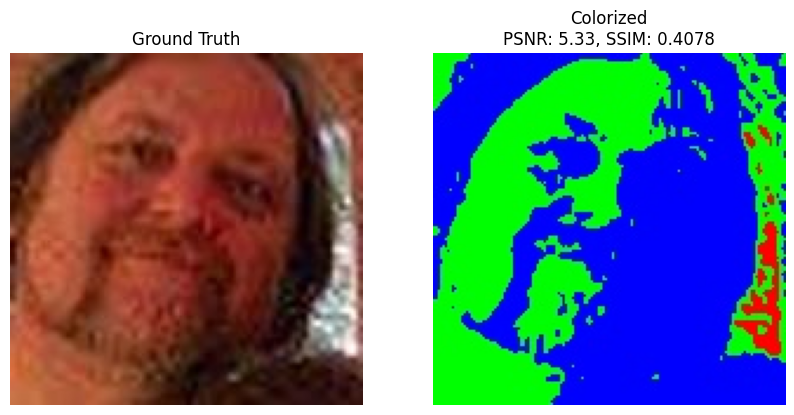

0002-image04733.jpg - PSNR: 5.55, SSIM: 0.2905


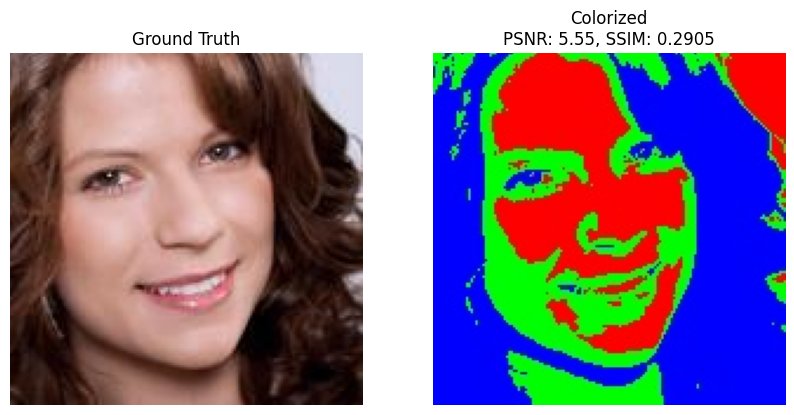

0003-image07098.jpg - PSNR: 5.54, SSIM: 0.5425


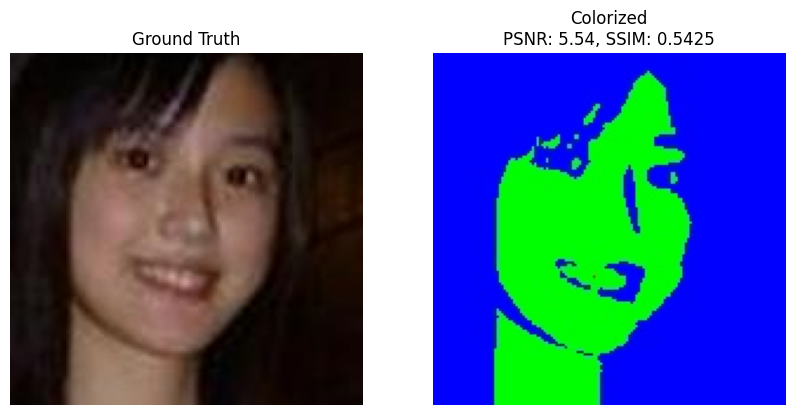

0004-image64929.jpg - PSNR: 5.51, SSIM: 0.5391


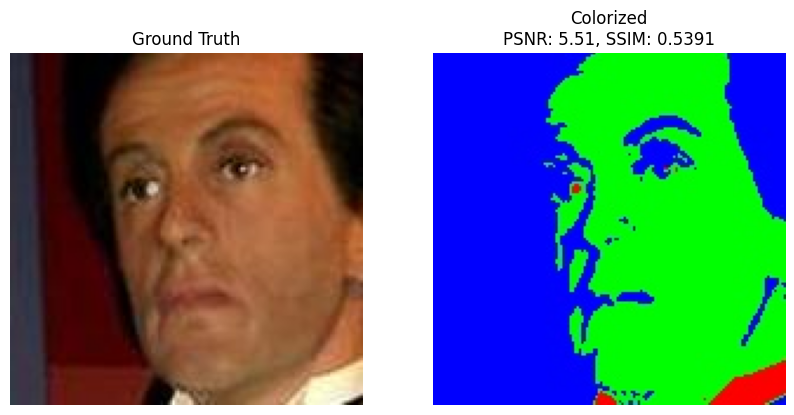

0005-image15367.jpg - PSNR: 6.02, SSIM: 0.3286


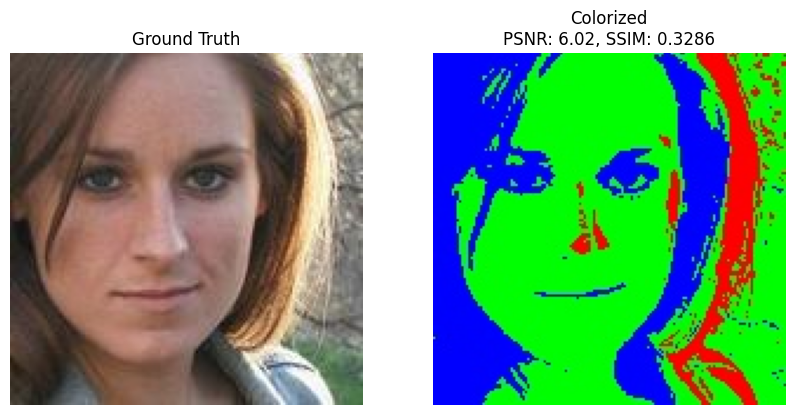

0006-image21655.jpg - PSNR: 6.06, SSIM: 0.5381


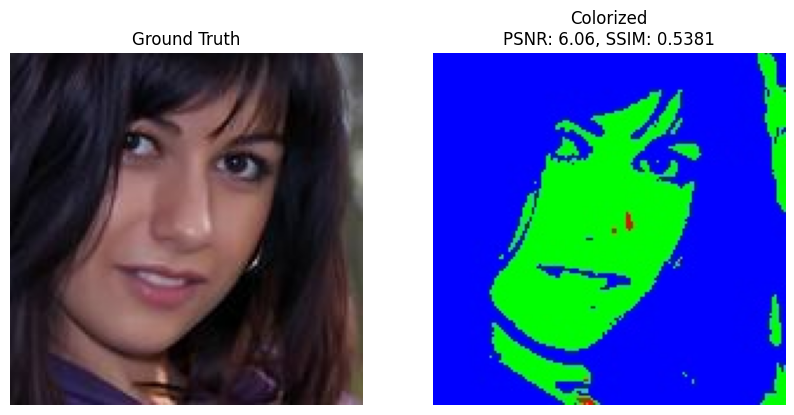

0007-image60542.jpg - PSNR: 5.18, SSIM: 0.0030


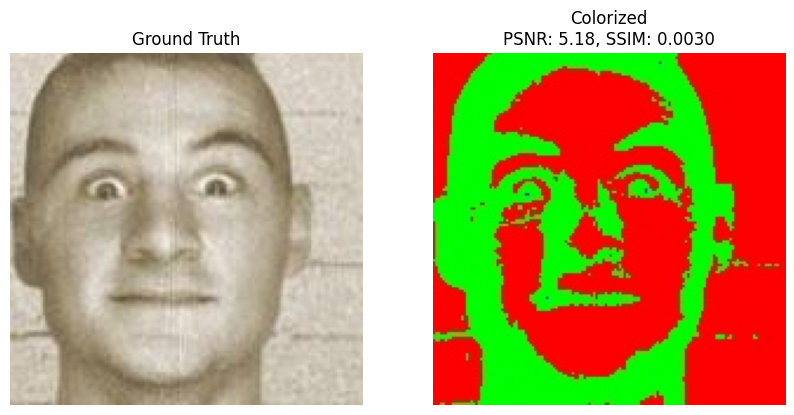

0008-image20752.jpg - PSNR: 5.45, SSIM: 0.2281


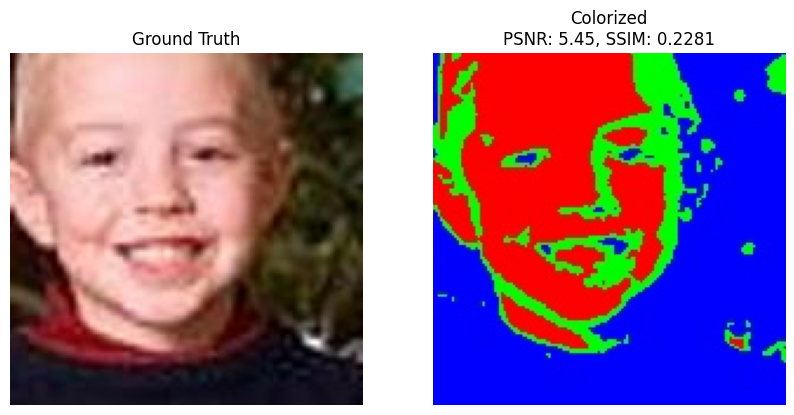

0009-image00550.jpg - PSNR: 5.44, SSIM: 0.2452


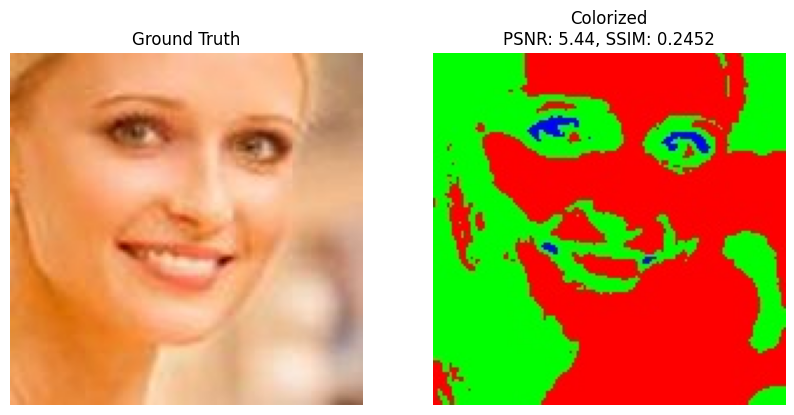

0010-image00597.jpg - PSNR: 5.45, SSIM: 0.3622


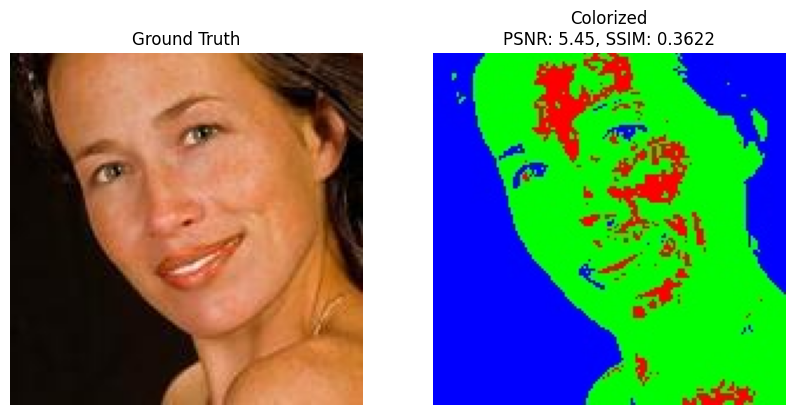

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

def compute_psnr(gt_image, generated_image):
    return cv2.PSNR(gt_image, generated_image)

def compute_ssim(gt_image, generated_image):
    # Convert to grayscale for SSIM computation
    gt_gray = cv2.cvtColor(gt_image, cv2.COLOR_BGR2GRAY)
    gen_gray = cv2.cvtColor(generated_image, cv2.COLOR_BGR2GRAY)
    return ssim(gt_gray, gen_gray)

# Define folders
gt_folder = "test1/color_images/"
generated_folder = "test1/output_images/color_mapping_images/"

# Get list of images in the ground truth folder
gt_filenames = [f for f in os.listdir(gt_folder) if f.endswith((".jpg", ".png"))]

# Loop through each ground truth image
for filename in gt_filenames:
    gt_path = os.path.join(gt_folder, filename)
    generated_path = os.path.join(generated_folder, filename + "_colorized.jpg")  # Modify if naming differs

    # Check if the generated image exists
    if not os.path.exists(generated_path):
        print(f"Skipping {filename}: Generated image not found.")
        continue

    # Load images
    gt_image = cv2.imread(gt_path)
    generated_image = cv2.imread(generated_path)

    # Ensure images are loaded properly
    if gt_image is None or generated_image is None:
        print(f"Error loading {filename}")
        continue

    # Ensure both images have the same size
    generated_image = cv2.resize(generated_image, (gt_image.shape[1], gt_image.shape[0]))

    # Compute PSNR and SSIM
    psnr_value = compute_psnr(gt_image, generated_image)
    ssim_value = compute_ssim(gt_image, generated_image)

    # Print results
    print(f"{filename} - PSNR: {psnr_value:.2f}, SSIM: {ssim_value:.4f}")

    # Convert images to RGB for matplotlib
    gt_rgb = cv2.cvtColor(gt_image, cv2.COLOR_BGR2RGB)
    generated_rgb = cv2.cvtColor(generated_image, cv2.COLOR_BGR2RGB)

    # Display images using Matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(gt_rgb)
    plt.title("Ground Truth")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(generated_rgb)
    plt.title(f"Colorized\nPSNR: {psnr_value:.2f}, SSIM: {ssim_value:.4f}")
    plt.axis("off")

    plt.show()  # Show the images
